## import the library

In [1]:
import slampy
import cv2
import numpy as np
from utils import *
import pandas as pd
import matplotlib.pyplot as plt
import time
import os

%matplotlib notebook

In [2]:
import orbslam2

## params
the configuration attribute of the algorithm can be found in the setting.yaml file,
you can change this file in order to execute different algorithm with different options

**image_folder** is the root folder of images 

In [2]:
image_folder = 'Dataset/KITTI_RAW/2011_09_26/2011_09_26_drive_0001_sync/image_02/'
setting_file ='settings.yaml'

initialize the system with the **setting_file** and the type of the sensor in this case monocular

In [3]:
app = slampy.System(setting_file,slampy.Sensor.MONOCULAR)

the input sensor select is MONOCULAR


## load the images
in this example we use the KITTI dataset, the images is not provided you can download it , in utils.py is also provide the method for read the TUM images named **load_images_TUM**

In [4]:
image_filenames, timestamps = load_images_KITTI(image_folder)
num_images = len(image_filenames)

run the algorithm with the load dataset and plot the depth map found in each frame if the tracking is OK

images in the sequences 108


<IPython.core.display.Javascript object>


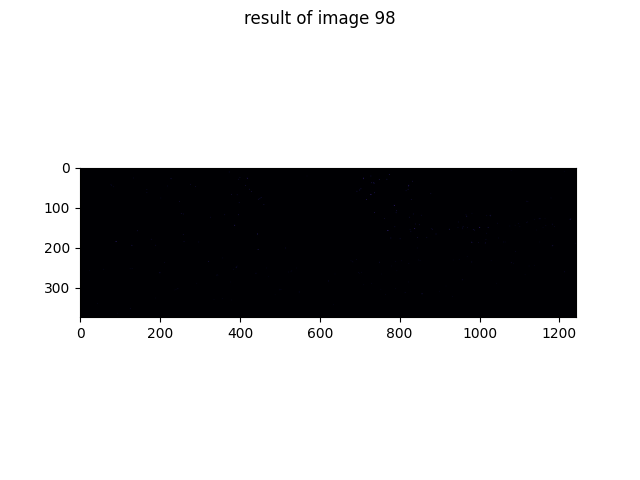

In [ ]:
print('images in the sequences {}'.format(num_images))
fig = plt.figure()
ax = plt.subplot(111)
for idx in range(num_images):
    # load and convert to RGB image 
    name = image_filenames[idx]
    image = cv2.imread(name)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    if image is None:
        print("failed to load image at {0}".format(self.idx))
        exit
    t1 = time.time()
    state = app.process_image_mono(image,timestamps[idx])
    t2 = time.time()
    if state == slampy.State.OK:
        #get the depth
        depth = app.get_depth()
        #plot the figure
        index = np.argwhere(depth>0)
        for point in index:
            image=cv2.circle(image,(int(point[1]),int(point[0])),10,(255,0,0),3)
        fig.suptitle('result of image {}'.format(idx))
        ax.imshow(image)
        fig.canvas.draw()
        
    #sleep the execution if the time is less than the image acquisition
    ttrack = t2 - t1
    t = 0
    if idx < num_images - 1:
        t = timestamps[idx + 1] - timestamps[idx]
    elif idx > 0:
        t = timestamps[idx] - timestamps[idx - 1]

    if ttrack < t:
        time.sleep(t - ttrack)
